<a href="https://colab.research.google.com/github/bbulla/Airplane-Crashes/blob/main/Desafio_EvaluacionBulla%2BDiaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regresión Lineal

######series temporales con Python y Scikit-learn

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf


plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv',sep=',', parse_dates=['Date'], index_col='Date')
df.head()

,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
Date,,,,,,,,,,,,,,,,
1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [ ]:
serie = df.groupby('Date')['Fatalities'].count().sort_index()

In [ ]:
serie_mensual = serie.resample('M').sum()

In [ ]:
serie_mensual

Date
1908-09-30    1
1908-10-31    0
1908-11-30    0
1908-12-31    0
1909-01-31    0
             ..
2019-03-31    2
2019-04-30    1
2019-05-31    2
2019-06-30    1
2019-07-31    1
Freq: M, Name: Fatalities, Length: 1331, dtype: int64

In [ ]:
serie_anual = serie.resample('A').sum()

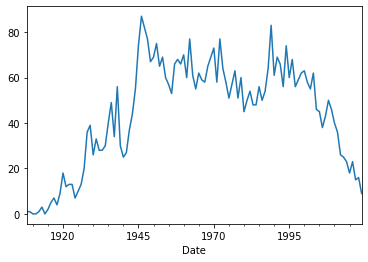

In [ ]:
serie_anual.plot()

Fechas train : 1908-12-31 00:00:00 --- 2007-12-31 00:00:00  (n=100)
Fechas test  : 2008-12-31 00:00:00 --- 2019-12-31 00:00:00  (n=12)


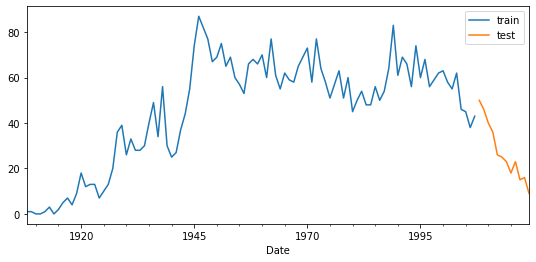

In [ ]:
steps = 100
serie_train = serie_anual[:steps]
serie_test  = serie_anual[steps:]

print(f"Fechas train : {serie_train.index.min()} --- {serie_train.index.max()}  (n={len(serie_train)})")
print(f"Fechas test  : {serie_test.index.min()} --- {serie_test.index.max()}  (n={len(serie_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
serie_train.plot(ax=ax, label='train')
serie_test.plot(ax=ax, label='test')
ax.legend();

In [ ]:
df_train = serie_train.to_frame()['1950-12-31':]

In [ ]:
df_train['Time'] = np.arange(len(df_train.index))

In [ ]:
from sklearn.linear_model import LinearRegression

# 1) Preparacion de datos
X = df_train.loc[:, ['Time']]  # features
y = df_train.loc[:, 'Fatalities']  # target

# 2) Entrenando el modelo
model = LinearRegression()
model.fit(X, y)
regressor = LinearRegression()
X_serie_train, X_serie_test, y_serie_train, y_serie_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [ ]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

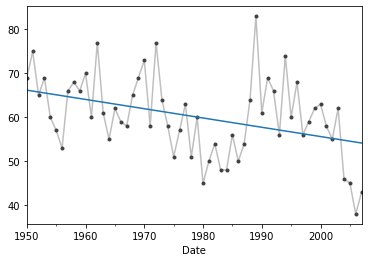

In [ ]:
ax = y.plot(**plot_params)
ax = y_pred.plot()

In [ ]:
regressor.fit(X_serie_train, y_serie_train)

LinearRegression()

In [ ]:
#Recuperamos la intersección
print(regressor.intercept_)

66.53557312252964


In [ ]:
#La pendiente
print(regressor.coef_)

[-0.23510972]


In [ ]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_serie_test)
y_pred

array([66.53557312, 65.36002453, 58.54184272, 63.47914679, 56.19074554,
       54.30986779, 57.83651356, 60.65783018, 55.7205261 , 63.71425651,
       55.25030666, 65.83024397])

In [ ]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_serie_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
Date,,,,
1950-12-31,69,66.535573,2.464427,3.571633
1955-12-31,57,65.360025,-8.360025,-14.666710
1984-12-31,48,58.541843,-10.541843,-21.962172
1963-12-31,61,63.479147,-2.479147,-4.064175
1994-12-31,74,56.190746,17.809254,24.066560
2002-12-31,55,54.309868,0.690132,1.254786
1987-12-31,54,57.836514,-3.836514,-7.104655
1975-12-31,51,60.657830,-9.657830,-18.936922
1996-12-31,68,55.720526,12.279474,18.058050


#Evaluación de Modelo Lineal 

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [ ]:
# MAPE PARA EL MODELO REGRESIÓN LINEAL
print("Regresión lineal:", mape(y_serie_test, y_pred))
# MAPE PARA EL MODELO ARIMA
print("ARIMA:", mape(y_serie_test, y_pred))

Regresión lineal: 0.11824094729754465
ARIMA: 0.11824094729754465


Obtenemos valores de 12% de presición

#Método ARIMA

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
df_train # DF MODELO ARIMA

,Fatalities,Time
Date,,
1950-12-31,69,0
1951-12-31,75,1
1952-12-31,65,2
1953-12-31,69,3
1954-12-31,60,4
1955-12-31,57,5
1956-12-31,53,6
1957-12-31,66,7
1958-12-31,68,8


In [ ]:
#identificamos si es estacionaria

def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


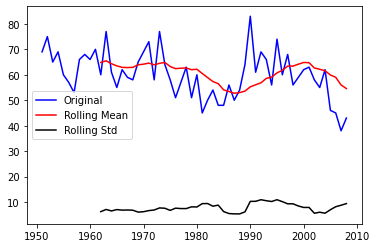

In [ ]:
rolling_mean = df_train['Fatalities'].rolling(window = 12).mean()
rolling_std = df_train['Fatalities'].rolling(window = 12).std()
plt.plot(df_train['Fatalities'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.show()

In [ ]:
df_log = np.log(df_train[['Fatalities']])

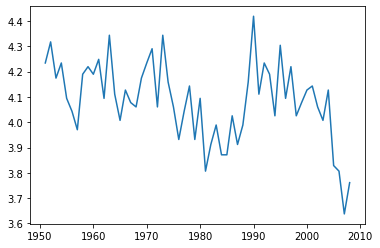

In [ ]:
plt.plot(df_log)

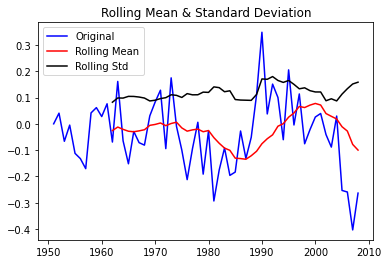

In [ ]:
#Probamos transformar serie de tiempo en estacionaria 
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace=True)
get_stationarity(df_log_exp_decay)

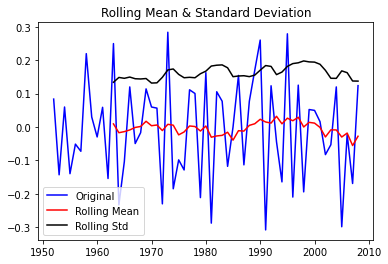

In [ ]:
#prueba 
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)

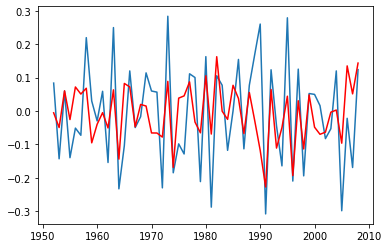

In [ ]:
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

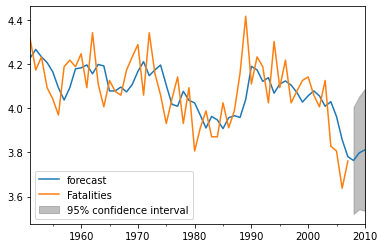

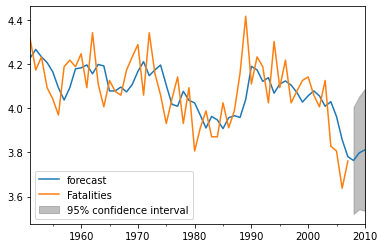

In [ ]:
results.plot_predict(1,60)

In [ ]:
y_serie_test

Date
1950-12-31    69
1955-12-31    57
1984-12-31    48
1963-12-31    61
1994-12-31    74
2002-12-31    55
1987-12-31    54
1975-12-31    51
1996-12-31    68
1962-12-31    77
1998-12-31    59
1953-12-31    69
Name: Fatalities, dtype: int64

#Evaluación de Modelo ARIMA



In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 9.9 MB 9.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


Evaluando modelo Arima
p-value: 0.12529784462142668
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=424.643, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=413.998, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=419.068, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=643.150, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=410.177, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=412.100, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=412.138, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=411.855, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=410.167, Time=0.33 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=415.359, Time=0.75 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=415.341, Time=0.44 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=413.421, Time=0.27 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=413.560, Time=0.17 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=417.374, Time=0.60

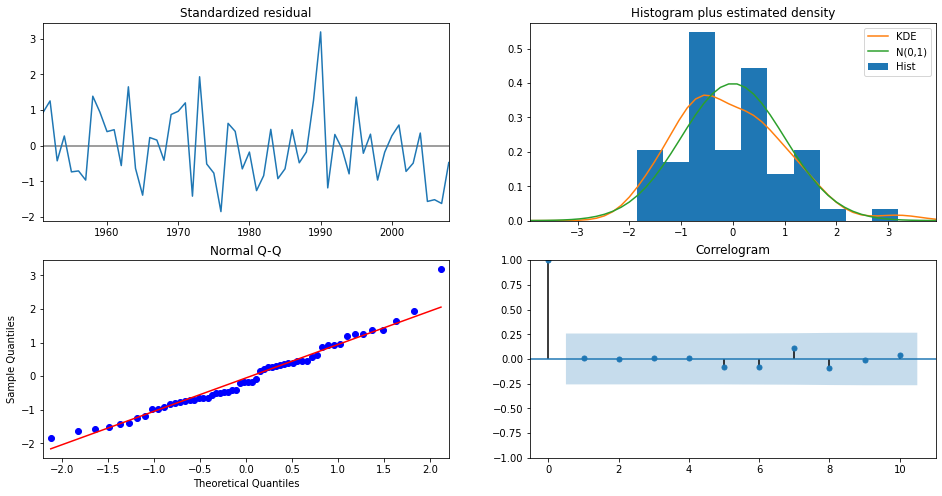

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as snf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_squared_error,r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm


print('Evaluando modelo Arima')
print("p-value:", adfuller(df_train['Fatalities'].dropna())[1])
model = pm.auto_arima(df_train['Fatalities'], start_p=0, start_q=0, max_order=6, stepwise=True, trace=True)
print(model.summary())
results= model.plot_diagnostics(figsize=(16, 8))
plt.savefig('model')
plt.show()